#**Project Title:**
Predicting probability of heart disease based on different risk factors

#**Heart Failure Clinical Data:**
Creator Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). Original Publication https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

#**Features Explanation:**
age: Age of the patient

Anaemia: Decrease of red blood cells or hemoglobin (0 = no, 1 = yes)

High blood pressure: If a patient has hypertension (0 = no, 1 = yes)

Creatinine phosphokinase (CPK): Level of the CPK enzyme in the blood (range from 23mcg/L to 7861mcg/L)

Diabetes: If the patient has diabetes (0 = no, 1 = yes)

Ejection fraction: Percentage of blood leaving (range from 14% to 80%)

sex: The person's sex (1 = male, 0 = female)

Platelets: Platelets in the blood (range from 25 kiloplatelets/mL to 850 kiloplatelets/mL)

Serum creatinine: Level of creatinine in the blood (range from 0.50mg/dL to 9.40mg/dL)

Serum sodium: Level of sodium in the blood (range from 114mEq/L to 148mEq/L)

Smoking: If the patient smokes (0 = no, 1 = yes)

Time: Follow-up period (range from 4 days to 285 days)

(target) death event: If the patient died during the follow-up period (0 = no, 1 = yes)


**Boolean features**

  - Sex: Gender of patient Male = 1, Female =0
  - Diabetes: 0 = No, 1 = Yes
  - Anaemia: 0 = No, 1 = Yes
  - High_blood_pressure: 0 = No, 1 = Yes
  - Smoking: 0 = No, 1 = Yes
  - DEATH_EVENT: 0 = No, 1 = Yes

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.graph_objs as go

>**Explore Data Analysis:**

In [6]:
clinical = pd.read_csv('https://raw.githubusercontent.com/laiz6660666/BA765-Session02/master/heart_failure_clinical_records_dataset.csv')
clinical.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


>Described table for all patients with Heart Failure issue

In [21]:
clinical.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


>Described table for all Heart Failure patients with Death Event

In [23]:
round(clinical[clinical['DEATH_EVENT']==1].describe(),2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.0
mean,65.22,0.48,670.20,0.42,33.47,0.41,256381.04,1.84,135.38,0.65,0.31,70.89,1.0
std,13.21,0.50,1316.58,0.50,12.53,0.49,98525.68,1.47,5.00,0.48,0.47,62.38,0.0
min,42.00,0.00,23.00,0.00,14.00,0.00,47000.00,0.60,116.00,0.00,0.00,4.00,1.0
25%,55.00,0.00,128.75,0.00,25.00,0.00,197500.00,1.08,133.00,0.00,0.00,25.50,1.0
50%,65.00,0.00,259.00,0.00,30.00,0.00,258500.00,1.30,135.50,1.00,0.00,44.50,1.0
75%,75.00,1.00,582.00,1.00,38.00,1.00,311000.00,1.90,138.25,1.00,1.00,102.25,1.0
max,95.00,1.00,7861.00,1.00,70.00,1.00,621000.00,9.40,146.00,1.00,1.00,241.00,1.0


>*Does Age and Sex count as an indicator for Death Event?*

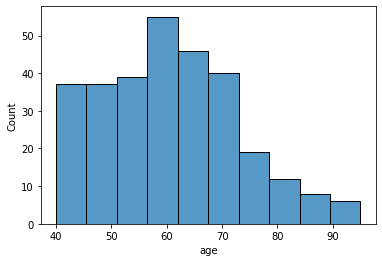

In [24]:

sns.histplot(clinical['age'])

*Age wise 40 to 80 the spread is High
less than 40 age and higher than 80 age people are very low*

In [29]:
fig = px.box(clinical, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [35]:
male = clinical[clinical["sex"]==1]
female = clinical[clinical["sex"]==0]

male_survi = male[clinical["DEATH_EVENT"]==0]
male_not = male[clinical["DEATH_EVENT"]==1]
female_survi = female[clinical["DEATH_EVENT"]==0]
female_not = female[clinical["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[clinical["DEATH_EVENT"]==0]),len(male[clinical["DEATH_EVENT"]==1]),
         len(female[clinical["DEATH_EVENT"]==0]),len(female[clinical["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)]);
fig.update_layout(
    title_text="Analysis on Survival - Gender");
fig.show();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us

#**Machine Learning Models**

#Feature Importance

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

X, y = clinical(return_X_y=True)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=775)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=775)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=775
)
clf.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
params = {'random_state': 775, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 8}

x, y = clinical.drop('DEATH_EVENT',axis=1), clinical['DEATH_EVENT']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

#**Random Forest Classifier**


In [ ]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=775)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=775)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#**Linear Regression**

In [ ]:
drop = ['DEATH_EVENT','creatinine_phosphokinase']

In [ ]:
X, y = clinical.drop(drop,axis=1), clinical['DEATH_EVENT']

In [ ]:
Features = ['time','ejection_fraction','serum_creatinine']

In [ ]:
Features = ['ejection_fraction','serum_creatinine']

In [ ]:
X, y = clinical[Features], clinical['DEATH_EVENT']

In [ ]:
x, y = clinical.drop('DEATH_EVENT',axis=1), clinical['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=775)

In [ ]:
from sklearn.linear_model import LogisticRegression  # 1. choose model class
model = LogisticRegression(solver='liblinear')     # 2. instantiate model

In [ ]:
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,time,ejection_fraction,serum_creatinine,DEATH_EVENT,predicted
0,159,121,45,1.1,0,0
1,26,24,40,1.0,1,1
2,50,43,25,1.0,1,1
3,233,209,38,1.4,0,0
4,256,220,38,1.7,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8111111111111111

#**K Neighbor Classifier**

In [ ]:
# K Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(Xtrain, ytrain)
kn_pred = kn_clf.predict(Xtest)
kn_acc = accuracy_score(ytest, kn_pred)


In [ ]:
kn_acc

0.7111111111111111

#**Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()             # 2. instantiate model
model.fit(Xtrain, ytrain)           # 3. fit model to data
y_model = model.predict(Xtest)        # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7